# Playing with Data on Pytorch-Geometric Datasets

#### References
* https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html
* http://htmlpreview.github.io/?https://github.com/rusty1s/rusty1s.github.io/blob/master/pyg_notebook.html
* https://discuss.pytorch.org/t/pytorch-geometric/44994/6
* https://www.python-course.eu/networkx.php
* https://github.com/gephi/gephi

In [1]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx

#### Data
It's the base class to define graphs on Pytorch Geometric, to specify a graph you need the following:
* The input features related to each Node "x"
* The output features related to each Node "y"
* The adjacency matrix to connect nodes "edge_index"

The adjacency matrix (edge_index) should be confined with the COO format, i.e. the first list contains the index of the source nodes, while the index of target nodes is specified in the second list.

In [28]:
# We will have 4 nodes, each node with 2 features
x = torch.tensor([[2,1], [5,6], [3,7], [12,0]], dtype=torch.float)
# Each node will have an output of one feature
y = torch.tensor([0, 1, 2, 3], dtype=torch.float)

edge_index = torch.tensor([[0, 2, 1, 0, 3, 0],
                           [3, 1, 0, 1, 2, 2]], dtype=torch.long)

# Define the graph
graph = Data(x=x, y=y, edge_index=edge_index)

print('Number of nodes:', graph.num_nodes)
print('Number of edges:', graph.num_edges)
print('graph:', graph)

Number of nodes: 4
Number of edges: 6
graph: Data(edge_index=[2, 6], x=[4, 2], y=[4])


In [29]:
node_labels = graph.y.numpy()
# Convert to networkx to plot
graph_x = to_networkx(graph)

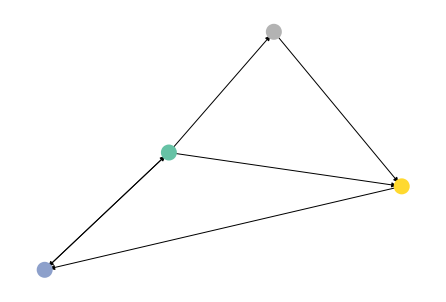

In [30]:
nx.draw(graph_x, cmap=plt.get_cmap('Set2'), node_size=100, node_color = node_labels, linewidths=6)
plt.show()

#### Karate Club
Zachary’s karate club network containing 34 nodes, connected by 154 (undirected and unweighted) edges. The node represent a person, the edges represent the relationship of people outside the Karate Club. That is, an edge is drawn if the individuals could be said to be friends.
* https://en.wikipedia.org/wiki/Zachary%27s_karate_club
* http://konect.cc/networks/ucidata-zachary/
* http://www1.ind.ku.dk/complexLearning/zachary1977.pdf
* https://studentwork.prattsi.org/infovis/labs/zacharys-karate-club/

In [5]:
from torch_geometric.datasets import KarateClub
dataset_karate = KarateClub()
karate = dataset_karate[0]
print('LEN dataset_karate:', len(dataset_karate))
print('Number of classes:', dataset_karate.num_classes)
print('Number of features per node:', dataset_karate.num_node_features)
print('Number of nodes:', karate.num_nodes)
print('Number of edges:', karate.num_edges)
print('karate:', karate)

LEN dataset_karate: 1
Number of classes: 2
Number of features per node: 34
Number of nodes: 34
Number of edges: 156
karate: Data(edge_index=[2, 156], x=[34, 34], y=[34])


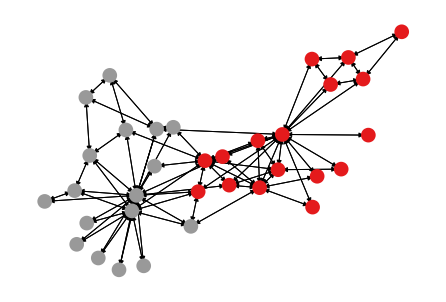

In [6]:
# Convert to networkx to plot
karate_graph = to_networkx(karate)
node_labels = karate.y.numpy()

nx.draw(karate_graph, cmap=plt.get_cmap('Set1'), node_color = node_labels, node_size=75,linewidths=6)
plt.show()

#### Get TU Dortmund University dataset
A variety of graph kernel benchmark datasets. The idea of this datasets is to classify graphs based on their structure.

The ENZYMES dataset has 6 classes and 600 samples

In [7]:
from torch_geometric.datasets import TUDataset
dataset_enzymes = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
print('LEN dataset_enzymes:', len(dataset_enzymes))

LEN dataset_enzymes: 600


In [8]:
enzimes = dataset_enzymes[0]
print('Number of nodes:', enzimes.num_nodes)
print('Number of edges:', enzimes.num_edges)
print('enzimes:', enzimes)

# Convert to networkx to plot
enzimes_graph = to_networkx(enzimes)
node_labels = enzimes.y.numpy()

Number of nodes: 37
Number of edges: 168
enzimes: Data(edge_index=[2, 168], x=[37, 3], y=[1])


#### Plot Graph

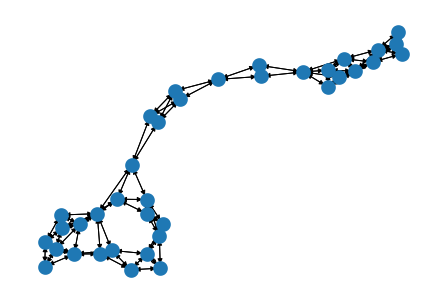

In [9]:
nx.draw(enzimes_graph, node_size=75,linewidths=6)
plt.show()

#### Get Planetoid Dataset
This dataset include: "Cora", "CiteSeer" and "PubMed" and is used to benchmark graph embeddings:
* https://arxiv.org/pdf/1603.08861.pdf

Nodes represent documents and edges represent citation links. Training, validation and test splits are given by binary masks.

In [10]:
from torch_geometric.datasets import Planetoid
# Cora has 6 classes but only one sample
dataset_cora = Planetoid(root = '/tmp/cora',name='Cora')
print('LEN dataset_cora:', len(dataset_cora))

LEN dataset_cora: 1


In [11]:
cora = dataset_cora[0]
print('Number of nodes:', cora.num_nodes)
print('Number of edges:', cora.num_edges)
print('cora:', cora)

# Convert to networkx to plot
coragraph = to_networkx(cora)

# Select labels
node_labels = cora.y[list(coragraph.nodes)].numpy()

Number of nodes: 2708
Number of edges: 10556
cora: Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])


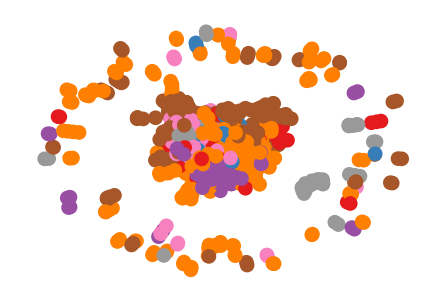

In [12]:
nx.draw(coragraph, cmap=plt.get_cmap('Set1'),node_color = node_labels,node_size=75,linewidths=6)
plt.show()